In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/arka_bagchi/Desktop/AirDNA/joshua_tree_data.csv')

# Display the first few rows of the dataset to ensure it has been loaded correctly
df.head()


,longitude,Has Parking,Cancellation Policy,Airbnb Communication Rating,Has Hot Tub,country,city,bedrooms,Airbnb Accuracy Rating,Published Weekly Rate,...,Response Time,Property Manager,Number of Reviews,Number of Photos,Number of Bookings LTM,latitude,Extra People Fee,Count Blocked Days LTM,Count Available Days LTM,zipcode
0,-116.412131,True,strict,10.0,False,United States,Rancho Mirage,1.0,10.0,2975.0,...,1.0,NaN,1.0,3.0,NaN,33.800909,0.0,NaN,NaN,92270
1,-116.343878,True,moderate,10.0,False,United States,Palm Desert,1.0,10.0,945.0,...,5094.0,NaN,6.0,6.0,NaN,33.764745,0.0,NaN,NaN,92211
2,-116.419236,True,super strict,NaN,True,United States,Rancho Mirage,3.0,NaN,6993.0,...,1373.5,Acme House,NaN,46.0,NaN,33.740625,0.0,NaN,NaN,92270
3,-116.479801,True,strict,NaN,True,United States,Cathedral City,1.0,NaN,1043.0,...,36045.0,NaN,NaN,8.0,NaN,33.829792,0.0,NaN,NaN,92234
4,-116.447929,True,flexible,NaN,False,United States,Cathedral City,2.0,NaN,2800.0,...,24151.0,NaN,NaN,5.0,NaN,33.776997,0.0,NaN,NaN,92234


First, we will look at the dataset size and shape. Then we will look at the columns and data types.

In [7]:
# Checking the size and shape of the dataset
df_shape = df.shape

# Checking the columns and their data types
df_info = df.info()

df_shape, df_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16278 entries, 0 to 16277
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   longitude                    16278 non-null  float64
 1   Has Parking                  16278 non-null  bool   
 2   Cancellation Policy          14610 non-null  object 
 3   Airbnb Communication Rating  9739 non-null   float64
 4   Has Hot Tub                  16278 non-null  bool   
 5   country                      16278 non-null  object 
 6   city                         16278 non-null  object 
 7   bedrooms                     16086 non-null  float64
 8   Airbnb Accuracy Rating       9740 non-null   float64
 9   Published Weekly Rate        7071 non-null   float64
 10  neighborhood                 2703 non-null   object 
 11  Airbnb Location Rating       9734 non-null   float64
 12  AirDNA Market                16278 non-null  object 
 13  adr             

((16278, 48), None)

The dataset has 16,278 rows and 48 columns.

Here's a breakdown of the columns and their data types:

Numerical (Float64): 25 columns

Object (String): 17 columns

Boolean: 5 columns

Integer (Int64): 1 column

This is a pretty rough dataset with lots of missing values - let us truly dive into the nature of this dirty dataset.

In [8]:
# Calculate the proportion of missing values for each column
missing_values_proportion = df.isnull().mean()

# Sort the columns by their proportion of missing values in descending order
sorted_missing_values = missing_values_proportion.sort_values(ascending=False)

sorted_missing_values

license                        0.856985
Property Manager               0.847770
neighborhood                   0.833948
Exact Location                 0.784249
VRBO Property ID               0.693881
Response Time                  0.645288
Extra People Fee               0.590183
Published Weekly Rate          0.565610
Published Monthly Rate         0.565549
adr                            0.435250
Occupancy Rate LTM             0.435250
Count Reservation Days LTM     0.435250
Number of Bookings LTM         0.435250
Count Blocked Days LTM         0.435250
Count Available Days LTM       0.435250
Airbnb Checkin Rating          0.402076
Airbnb Location Rating         0.402015
Airbnb Communication Rating    0.401708
Airbnb Accuracy Rating         0.401646
Overall Rating                 0.335483
Number of Reviews              0.316194
Response Rate                  0.145288
Price Tier                     0.140619
Cleaning Fee                   0.123664
Cancellation Policy            0.102470


This list helps us understand which columns have a significant proportion of missing data. Depending on the analysis goals and the significance of each feature, we can decide on appropriate strategies to handle these missing values.

Our focus will be location based analysis. We are going to be trying characterize the rental landscape in the Joshua Tree region. Therefore, it is good that location features such as long/lat and zipcode are not missing any values. 

Given the focus on location, we'll certainly retain longitude, latitude, and zipcode. Additionally, columns like city, neighborhood, and Exact Location might provide more granular insight into location-specific trends.

Potential Target Variables: adr, Occupancy Rate LTM, and Overall Rating are potential targets for modeling. We'll retain them but might need strategies to handle their missing values.

Columns with very high missing values and low relevance to the project goal can be dropped. For instance, license, Property Manager, VRBO Property ID, etc.

Given the dataset and the project's focus on location-based analysis, I'll list the columns that might be less relevant or have too many missing values. For each of these columns, we'll explore their data types and unique values to make an informed decision.

VRBO Property ID: Contains specific property IDs from VRBO (a vacation rental platform). Given that we are focusing primarily on Airbnb data and the large proportion of missing values, it's a candidate for removal.

Property Manager: This column has a vast array of different property managers. While this could be useful for some analyses, it's mostly missing and may not be essential for our location-based focus.

Response Time: It seems to have continuous values, possibly indicating the time taken by the property owner/manager to respond. Given the high proportion of missing values, we can consider dropping it.

Extra People Fee: Represents additional fees for extra people. A significant proportion of these values are missing, and it might not be crucial for location-based analysis.

Exact Location: This is a binary column, indicating whether the exact location of the property is provided or not. The majority of the values are missing, so it may not be essential.

license: Contains licensing information for the properties. A significant portion of this column is missing.

In [9]:
# List of columns to drop
columns_to_drop = ["VRBO Property ID", "Property Manager", "Response Time", "Extra People Fee", "Exact Location", "license"]

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Display the updated dataframe
df.head()


,longitude,Has Parking,Cancellation Policy,Airbnb Communication Rating,Has Hot Tub,country,city,bedrooms,Airbnb Accuracy Rating,Published Weekly Rate,...,currency,Count Reservation Days LTM,Airbnb Checkin Rating,Number of Reviews,Number of Photos,Number of Bookings LTM,latitude,Count Blocked Days LTM,Count Available Days LTM,zipcode
0,-116.412131,True,strict,10.0,False,United States,Rancho Mirage,1.0,10.0,2975.0,...,usd,NaN,10.0,1.0,3.0,NaN,33.800909,NaN,NaN,92270
1,-116.343878,True,moderate,10.0,False,United States,Palm Desert,1.0,10.0,945.0,...,usd,NaN,10.0,6.0,6.0,NaN,33.764745,NaN,NaN,92211
2,-116.419236,True,super strict,NaN,True,United States,Rancho Mirage,3.0,NaN,6993.0,...,usd,NaN,NaN,NaN,46.0,NaN,33.740625,NaN,NaN,92270
3,-116.479801,True,strict,NaN,True,United States,Cathedral City,1.0,NaN,1043.0,...,usd,NaN,NaN,NaN,8.0,NaN,33.829792,NaN,NaN,92234
4,-116.447929,True,flexible,NaN,False,United States,Cathedral City,2.0,NaN,2800.0,...,usd,NaN,NaN,NaN,5.0,NaN,33.776997,NaN,NaN,92234


In [11]:
df.shape

(16278, 42)

In [12]:
# Calculate the proportion of missing values for each column
missing_proportions = df.isnull().mean().sort_values(ascending=False)

missing_proportions


neighborhood                   0.833948
Published Weekly Rate          0.565610
Published Monthly Rate         0.565549
Occupancy Rate LTM             0.435250
Count Available Days LTM       0.435250
Count Blocked Days LTM         0.435250
Count Reservation Days LTM     0.435250
Number of Bookings LTM         0.435250
adr                            0.435250
Airbnb Checkin Rating          0.402076
Airbnb Location Rating         0.402015
Airbnb Communication Rating    0.401708
Airbnb Accuracy Rating         0.401646
Overall Rating                 0.335483
Number of Reviews              0.316194
Response Rate                  0.145288
Price Tier                     0.140619
Cleaning Fee                   0.123664
Cancellation Policy            0.102470
Minimum Stay                   0.014129
bedrooms                       0.011795
Number of Photos               0.003563
bathrooms                      0.003133
Max Guests                     0.000307
Listing Type                   0.000123


In [13]:
# Dropping the specified columns
df.drop(columns=['neighborhood', 'Count Available Days LTM', 'Count Blocked Days LTM', 'Count Reservation Days LTM'], inplace=True)

# Checking the shape of the dataframe after dropping columns
print(df.shape)


(16278, 38)


In [14]:
# Calculate the number of missing values for each row
df['missing_values_count'] = df.isnull().sum(axis=1)

# Filter rows that have more than a threshold of missing values (e.g., 10)
rows_with_high_missing = df[df['missing_values_count'] > 10]

rows_with_high_missing[['missing_values_count']].head()  # Display the count of missing values for these rows


,missing_values_count
8,11
15,11
24,12
25,12
27,11


In [15]:
# Calculate the proportion of rows with missing values across multiple columns
rows_with_many_missing = (df.isnull().sum(axis=1) > 10).sum()
proportion_rows_with_many_missing = rows_with_many_missing / len(df)

proportion_rows_with_many_missing


0.10676987344882664

In [16]:
# Proportion of rows with more than 15 missing values
prop_missing_15 = (df.isnull().sum(axis=1) > 15).mean()

# Proportion of rows with more than 20 missing values
prop_missing_20 = (df.isnull().sum(axis=1) > 20).mean()

prop_missing_15, prop_missing_20


(0.00012286521685710776, 0.0)

In [17]:
# Drop rows that have more than 10 missing values
df_cleaned = df[df.isnull().sum(axis=1) <= 10]

# Display the shape of the cleaned dataframe
df_cleaned.shape


(14540, 39)

In [18]:
# Calculate the proportion of rows in df_cleaned that have at least one missing value
proportion_rows_with_missing_values = df_cleaned.isnull().any(axis=1).mean()

proportion_rows_with_missing_values


0.8887207702888583

In [19]:
# Calculate the proportion of missing values for each column in df_cleaned
missing_proportions_cleaned = df_cleaned.isnull().mean().sort_values(ascending=False)

missing_proportions_cleaned


Published Weekly Rate          0.550757
Published Monthly Rate         0.550757
adr                            0.375309
Occupancy Rate LTM             0.375309
Number of Bookings LTM         0.375309
Airbnb Checkin Rating          0.330605
Airbnb Location Rating         0.330536
Airbnb Communication Rating    0.330193
Airbnb Accuracy Rating         0.330124
Overall Rating                 0.291472
Number of Reviews              0.241059
Response Rate                  0.105365
Price Tier                     0.093054
Cancellation Policy            0.092710
Cleaning Fee                   0.070083
bedrooms                       0.011554
bathrooms                      0.001376
Number of Photos               0.001307
Minimum Stay                   0.000757
Max Guests                     0.000069
currency                       0.000000
Has Kitchen                    0.000000
Listing URL                    0.000000
latitude                       0.000000
zipcode                        0.000000


The columns "Published Weekly Rate", "Published Monthly Rate", "adr", "Occupancy Rate LTM", and "Number of Bookings LTM" have the highest proportions of missing values. These columns might need further examination and decisions on how to handle their missing values.







In [20]:
# Count the number of rows where both 'Published Weekly Rate' and 'Published Monthly Rate' are missing
missing_both_rates = df_cleaned[df_cleaned['Published Weekly Rate'].isnull() & df_cleaned['Published Monthly Rate'].isnull()].shape[0]

missing_both_rates


8008

In [21]:
# Drop the two rate columns from df_cleaned
df_cleaned = df_cleaned.drop(columns=['Published Weekly Rate', 'Published Monthly Rate'])

# Display the shape of the updated dataframe
df_cleaned.shape


(14540, 37)

In [22]:
# Calculate the proportion of missing values for each remaining column in df_cleaned
missing_proportions_cleaned = df_cleaned.isnull().mean().sort_values(ascending=False)

missing_proportions_cleaned


Number of Bookings LTM         0.375309
adr                            0.375309
Occupancy Rate LTM             0.375309
Airbnb Checkin Rating          0.330605
Airbnb Location Rating         0.330536
Airbnb Communication Rating    0.330193
Airbnb Accuracy Rating         0.330124
Overall Rating                 0.291472
Number of Reviews              0.241059
Response Rate                  0.105365
Price Tier                     0.093054
Cancellation Policy            0.092710
Cleaning Fee                   0.070083
bedrooms                       0.011554
bathrooms                      0.001376
Number of Photos               0.001307
Minimum Stay                   0.000757
Max Guests                     0.000069
currency                       0.000000
Has Kitchen                    0.000000
Listing URL                    0.000000
latitude                       0.000000
zipcode                        0.000000
longitude                      0.000000
Has Pool                       0.000000


In [23]:
# Calculate the proportion of rows missing at least one of the specified columns
columns_to_check = [
    "Number of Bookings LTM", "adr", "Occupancy Rate LTM", 
    "Airbnb Checkin Rating", "Airbnb Location Rating", "Airbnb Communication Rating",
    "Airbnb Accuracy Rating", "Overall Rating", "Number of Reviews"
]

missing_in_specified = df_cleaned[columns_to_check].isnull().any(axis=1).mean()

missing_in_specified


0.6164374140302613

Approximately 61.64% of the rows in the cleaned dataset are missing values in one or more of the specified columns.

In [24]:
# Extracting the data types for the specified columns
column_data_types = df_cleaned[['Airbnb Checkin Rating', 'Airbnb Location Rating', 'Airbnb Accuracy Rating', 'Overall Rating']].dtypes

# Extracting the minimum and maximum values for the specified columns
column_min_values = df_cleaned[['Airbnb Checkin Rating', 'Airbnb Location Rating', 'Airbnb Accuracy Rating', 'Overall Rating']].min()
column_max_values = df_cleaned[['Airbnb Checkin Rating', 'Airbnb Location Rating', 'Airbnb Accuracy Rating', 'Overall Rating']].max()

column_data_types, column_min_values, column_max_values


(Airbnb Checkin Rating     float64
 Airbnb Location Rating    float64
 Airbnb Accuracy Rating    float64
 Overall Rating            float64
 dtype: object,
 Airbnb Checkin Rating     2.0
 Airbnb Location Rating    2.0
 Airbnb Accuracy Rating    2.0
 Overall Rating            0.0
 dtype: float64,
 Airbnb Checkin Rating      10.0
 Airbnb Location Rating     10.0
 Airbnb Accuracy Rating     10.0
 Overall Rating            100.0
 dtype: float64)

It seems like the Airbnb ratings are on a scale from 2 to 10, while the Overall Rating is on a scale from 0 to 100.

In [25]:
# Drop the specified columns
df_cleaned = df_cleaned.drop(columns=['Airbnb Checkin Rating', 'Airbnb Location Rating', 'Airbnb Accuracy Rating'])


In [26]:
df_cleaned.shape


(14540, 34)

In [27]:
# Drop the "Airbnb Communication Rating" column
df_cleaned.drop('Airbnb Communication Rating', axis=1, inplace=True)

# Show some sample values from the "Cancellation Policy" column
cancellation_policy_samples = df_cleaned['Cancellation Policy'].sample(10)
cancellation_policy_samples


13160    flexible
8624     moderate
7647       strict
3648     flexible
4552       strict
15335         NaN
5475          NaN
14500      strict
7893     flexible
7455     moderate
Name: Cancellation Policy, dtype: object

After dropping the "Communication Rating" column, I've decided to look at the "Cancellation policy" column. It seems the "Cancellation Policy" column contains categorical values like "strict", "flexible", and "moderate".

In [28]:
# Display sample values from the "Response Rate" column
df_cleaned["Response Rate"].sample(10)


15743      NaN
14097      NaN
15052      NaN
12683     98.0
5052       0.0
7059     100.0
10987     28.0
14214      NaN
7022     100.0
12856     80.0
Name: Response Rate, dtype: float64

It seems that many hosts have a 100% response rate, but there are also other values like 50% and 75%. Let's drop this column

In [29]:
# Drop the 'Response Rate' column
df_cleaned = df_cleaned.drop(columns=['Response Rate'])

# Show the shape of the dataframe
df_cleaned.shape


(14540, 32)

In [30]:
# Display sample values from the "Price Tier" column
df_cleaned["Price Tier"].sample(10)


5366       luxury
1513       budget
11798     economy
9996      upscale
2677      economy
5520       luxury
2377      upscale
10941    midscale
2828      economy
13533      luxury
Name: Price Tier, dtype: object

The sample values for the "Price Tier" column are as follows:

midscale
luxury
upscale
economy
These values represent different pricing categories or tiers for the properties.

In [32]:
# Calculate the proportion of missing values for each column
remaining_missing_proportions = df_cleaned.isnull().mean().sort_values(ascending=False)

# Calculate the proportion of rows with any missing values
proportion_rows_with_missing_values = (df_cleaned.isnull().sum(axis=1) > 0).mean()

remaining_missing_proportions, proportion_rows_with_missing_values


(Number of Bookings LTM    0.375309
 Occupancy Rate LTM        0.375309
 adr                       0.375309
 Overall Rating            0.291472
 Number of Reviews         0.241059
 Price Tier                0.093054
 Cancellation Policy       0.092710
 Cleaning Fee              0.070083
 bedrooms                  0.011554
 bathrooms                 0.001376
 Number of Photos          0.001307
 Minimum Stay              0.000757
 Max Guests                0.000069
 latitude                  0.000000
 zipcode                   0.000000
 currency                  0.000000
 Has Kitchen               0.000000
 Listing URL               0.000000
 Location Type             0.000000
 longitude                 0.000000
 Property ID               0.000000
 Has Parking               0.000000
 Created Date              0.000000
 Has Pool                  0.000000
 Host Type                 0.000000
 Listing Type              0.000000
 Pets Allowed              0.000000
 AirDNA Market             0

In [33]:
# Drop rows with any missing values
df_cleaned = df_cleaned.dropna()

# Display the shape of the cleaned dataframe
df_cleaned.shape


(5349, 32)

In [34]:
remaining_missing_proportions 

Number of Bookings LTM    0.375309
Occupancy Rate LTM        0.375309
adr                       0.375309
Overall Rating            0.291472
Number of Reviews         0.241059
Price Tier                0.093054
Cancellation Policy       0.092710
Cleaning Fee              0.070083
bedrooms                  0.011554
bathrooms                 0.001376
Number of Photos          0.001307
Minimum Stay              0.000757
Max Guests                0.000069
latitude                  0.000000
zipcode                   0.000000
currency                  0.000000
Has Kitchen               0.000000
Listing URL               0.000000
Location Type             0.000000
longitude                 0.000000
Property ID               0.000000
Has Parking               0.000000
Created Date              0.000000
Has Pool                  0.000000
Host Type                 0.000000
Listing Type              0.000000
Pets Allowed              0.000000
AirDNA Market             0.000000
city                

In [35]:
missing_info = df_cleaned.isnull().mean().sort_values(ascending=False).rename_axis('Column').reset_index()
missing_info.columns = ['Column', 'Missing Proportion']

print(missing_info)

                    Column  Missing Proportion
0                longitude                 0.0
1              Has Parking                 0.0
2                  zipcode                 0.0
3                 latitude                 0.0
4   Number of Bookings LTM                 0.0
5         Number of Photos                 0.0
6        Number of Reviews                 0.0
7                 currency                 0.0
8              Has Kitchen                 0.0
9              Listing URL                 0.0
10              Price Tier                 0.0
11            Cleaning Fee                 0.0
12           Location Type                 0.0
13            Minimum Stay                 0.0
14          Overall Rating                 0.0
15             Property ID                 0.0
16               bathrooms                 0.0
17            Created Date                 0.0
18                Has Pool                 0.0
19               Host Type                 0.0
20           

In [36]:
import pandas as pd

# Assuming df_cleaned is your DataFrame
num_rows_with_nan = df_cleaned.isnull().any(axis=1).sum()

print(f"Number of rows with NaN values: {num_rows_with_nan}")


Number of rows with NaN values: 0


In [37]:
data_types = df_cleaned.dtypes

print(data_types)

longitude                 float64
Has Parking                  bool
Cancellation Policy        object
Has Hot Tub                  bool
country                    object
city                       object
bedrooms                  float64
AirDNA Market              object
adr                       float64
Pets Allowed                 bool
Occupancy Rate LTM        float64
Max Guests                float64
Listing Type               object
Host Type                  object
Has Pool                     bool
Created Date               object
bathrooms                 float64
Property ID                object
Overall Rating            float64
Minimum Stay              float64
Location Type              object
Cleaning Fee              float64
Price Tier                 object
Listing URL                object
Has Kitchen                  bool
currency                   object
Number of Reviews         float64
Number of Photos          float64
Number of Bookings LTM    float64
latitude      

In [38]:
object_columns = df_cleaned.select_dtypes(include=['object'])

for column in object_columns.columns:
    unique_values = df_cleaned[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print("\n")

Unique values for column 'Cancellation Policy':
['strict' 'moderate' 'super strict' 'flexible']


Unique values for column 'country':
['United States']


Unique values for column 'city':
['Pioneertown' 'Palm Desert' 'Yucca Valley' 'Joshua Tree'
 'Desert Hot Springs' 'Landers' 'Cathedral City' 'Rancho Mirage'
 'North Palm Springs' 'Whitewater' 'Morongo Valley' 'Thousand Palms']


Unique values for column 'AirDNA Market':
['JOSHUA TREE, CA' 'COACHELLA VALLEY, CA']


Unique values for column 'Listing Type':
['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']


Unique values for column 'Host Type':
['2-5 Units' '21+ Units' '6-20 Units' '1 Unit']


Unique values for column 'Created Date':
['2016-04-12' '2016-04-21' '2016-04-11' ... '2016-03-29' '2016-04-08'
 '2016-02-18']


Unique values for column 'Property ID':
['abnb_12412999' 'abnb_12614845' 'abnb_12402361' ... 'abnb_12469623'
 'abnb_11378288' 'abnb_12011865']


Unique values for column 'Location Type':
['Destination/Resort - 

In [39]:
# Drop the specified columns
columns_to_drop = ["Property ID", "country", "currency", "Listing URL"]
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Show the shape of the DataFrame after dropping the columns
print("Shape of the DataFrame after dropping columns:")
print(df_cleaned.shape)


Shape of the DataFrame after dropping columns:
(5349, 28)


In [40]:
# Display the list of columns and their data types
column_data_types = df_cleaned.dtypes
print(column_data_types)


longitude                 float64
Has Parking                  bool
Cancellation Policy        object
Has Hot Tub                  bool
city                       object
bedrooms                  float64
AirDNA Market              object
adr                       float64
Pets Allowed                 bool
Occupancy Rate LTM        float64
Max Guests                float64
Listing Type               object
Host Type                  object
Has Pool                     bool
Created Date               object
bathrooms                 float64
Overall Rating            float64
Minimum Stay              float64
Location Type              object
Cleaning Fee              float64
Price Tier                 object
Has Kitchen                  bool
Number of Reviews         float64
Number of Photos          float64
Number of Bookings LTM    float64
latitude                  float64
zipcode                     int64
missing_values_count        int64
dtype: object


In [41]:
# Get the column names and their data types
column_info = df_cleaned.dtypes.reset_index()
column_info.columns = ['Column Name', 'Data Type']

# Get the total number of columns
num_columns = len(df_cleaned.columns)

# Display the column information and the total number of columns
print("Columns and their data types:")
print(column_info)

print("\nTotal number of columns:", num_columns)


Columns and their data types:
               Column Name Data Type
0                longitude   float64
1              Has Parking      bool
2      Cancellation Policy    object
3              Has Hot Tub      bool
4                     city    object
5                 bedrooms   float64
6            AirDNA Market    object
7                      adr   float64
8             Pets Allowed      bool
9       Occupancy Rate LTM   float64
10              Max Guests   float64
11            Listing Type    object
12               Host Type    object
13                Has Pool      bool
14            Created Date    object
15               bathrooms   float64
16          Overall Rating   float64
17            Minimum Stay   float64
18           Location Type    object
19            Cleaning Fee   float64
20              Price Tier    object
21             Has Kitchen      bool
22       Number of Reviews   float64
23        Number of Photos   float64
24  Number of Bookings LTM   float64
25      

In [42]:
# Extract and display all unique values from the "missing_values_count" column in the df_cleaned dataframe
unique_missing_values_counts = df_cleaned["missing_values_count"].unique()
unique_missing_values_counts


array([0, 2, 1, 6, 3, 7])

In [43]:
# Count the number of rows with the specified missing values counts
missing_values_counts = [1, 2, 6, 3, 7]
counts = df_cleaned["missing_values_count"].value_counts().loc[missing_values_counts]

counts


missing_values_count
1       2
2    3583
6      39
3      68
7      39
Name: count, dtype: int64

In [44]:
# Drop the "missing_values_count" column from df_cleaned
df_cleaned = df_cleaned.drop(columns=["missing_values_count"])

# Confirm the shape of the updated dataframe
df_cleaned_shape_after_dropping_missing_count = df_cleaned.shape
df_cleaned_shape_after_dropping_missing_count


(5349, 27)

We no longer have any misssing values in any column, so we can now cleanse the individual columns to prepare the data types for EDA and modeling.

In [45]:
# 1. Inspect Data Types

# Displaying the data types of each column in df_cleaned
data_types = df_cleaned.dtypes
data_types


longitude                 float64
Has Parking                  bool
Cancellation Policy        object
Has Hot Tub                  bool
city                       object
bedrooms                  float64
AirDNA Market              object
adr                       float64
Pets Allowed                 bool
Occupancy Rate LTM        float64
Max Guests                float64
Listing Type               object
Host Type                  object
Has Pool                     bool
Created Date               object
bathrooms                 float64
Overall Rating            float64
Minimum Stay              float64
Location Type              object
Cleaning Fee              float64
Price Tier                 object
Has Kitchen                  bool
Number of Reviews         float64
Number of Photos          float64
Number of Bookings LTM    float64
latitude                  float64
zipcode                     int64
dtype: object

Here are the data types of the columns in the df_cleaned dataframe:

Float columns (e.g., longitude, bedrooms, adr, Occupancy Rate LTM, bathrooms, etc.)

Boolean columns (e.g., Has Parking, Has Hot Tub, Pets Allowed, Has Pool, Has Kitchen)

Object columns (e.g., Cancellation Policy, city, AirDNA Market, Listing Type, Host Type, 
Created Date, Location Type, Price Tier)

Integer columns (e.g., zipcode)


For object data types, we should inspect the unique values and their distribution.

For numerical (float and integer) columns, we can summarize their statistics to check for any anomalies or values that don't make sense in the given context.

For boolean columns, we can check the distribution of True vs. False values.


In [46]:
# Inspecting unique values for columns with data type 'object'
object_columns_info = {}
for column in df_cleaned.select_dtypes(include=['object']).columns:
    object_columns_info[column] = df_cleaned[column].unique()

object_columns_info


{'Cancellation Policy': array(['strict', 'moderate', 'super strict', 'flexible'], dtype=object),
 'city': array(['Pioneertown', 'Palm Desert', 'Yucca Valley', 'Joshua Tree',
        'Desert Hot Springs', 'Landers', 'Cathedral City', 'Rancho Mirage',
        'North Palm Springs', 'Whitewater', 'Morongo Valley',
        'Thousand Palms'], dtype=object),
 'AirDNA Market': array(['JOSHUA TREE, CA', 'COACHELLA VALLEY, CA'], dtype=object),
 'Listing Type': array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
       dtype=object),
 'Host Type': array(['2-5 Units', '21+ Units', '6-20 Units', '1 Unit'], dtype=object),
 'Created Date': array(['2016-04-12', '2016-04-21', '2016-04-11', ..., '2016-03-29',
        '2016-04-08', '2016-02-18'], dtype=object),
 'Location Type': array(['Destination/Resort - Mountains/Lake'], dtype=object),
 'Price Tier': array(['luxury', 'upscale', 'midscale', 'economy', 'budget'], dtype=object)}

Cancellation Policy:

Values: ['strict', 'moderate', 'super strict', 'flexible']
These values seem appropriate and can be treated as categorical data.

City:
Values: Various city names like ['Pioneertown', 'Palm Desert', ...]
These are categorical and seem appropriate.

AirDNA Market:
Values: ['JOSHUA TREE, CA', 'COACHELLA VALLEY, CA']
This can be treated as a categorical variable.

Listing Type:
Values: ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']
This column can remain as categorical.
Host Type:
Values: ['2-5 Units', '21+ Units', '6-20 Units', '1 Unit']
These represent categories and can be treated as such.
Created Date:

Values: ['2016-04-12', ...]
This seems like a date column. We should convert it to a datetime datatype to facilitate time-based analysis.
Location Type:

Only one unique value: ['Destination/Resort - Mountains/Lake']
Since this column has only one value, it doesn't provide any variance. We should consider dropping it.
Price Tier:

Values: ['luxury', 'upscale', 'midscale', 'economy', 'budget']
These are categorical and seem appropriate.


Convert the "Created Date" column to datetime datatype.

Drop the "Location Type" column as it has only one unique value.

For the other object columns, depending on the subsequent analysis, we can consider converting 
them to categorical datatype or encoding them for modeling purposes. This can be done in later preprocessing steps or EDA. 

In [47]:
# Convert the "Created Date" column to datetime datatype
df_cleaned["Created Date"] = pd.to_datetime(df_cleaned["Created Date"])

# Drop the "Location Type" column as it has only one unique value
df_cleaned = df_cleaned.drop(columns=["Location Type"])

# Confirm the changes
data_types_updated = df_cleaned.dtypes
data_types_updated


longitude                        float64
Has Parking                         bool
Cancellation Policy               object
Has Hot Tub                         bool
city                              object
bedrooms                         float64
AirDNA Market                     object
adr                              float64
Pets Allowed                        bool
Occupancy Rate LTM               float64
Max Guests                       float64
Listing Type                      object
Host Type                         object
Has Pool                            bool
Created Date              datetime64[ns]
bathrooms                        float64
Overall Rating                   float64
Minimum Stay                     float64
Cleaning Fee                     float64
Price Tier                        object
Has Kitchen                         bool
Number of Reviews                float64
Number of Photos                 float64
Number of Bookings LTM           float64
latitude        

In [49]:
df_cleaned.shape

(5349, 26)

In [50]:
df_cleaned.describe()

,longitude,bedrooms,adr,Occupancy Rate LTM,Max Guests,Created Date,bathrooms,Overall Rating,Minimum Stay,Cleaning Fee,Number of Reviews,Number of Photos,Number of Bookings LTM,latitude,zipcode
count,5349.000000,5349.000000,5349.000000,5349.000000,5349.000000,5349,5349.000000,5349.000000,5349.000000,5349.000000,5349.000000,5349.000000,5349.000000,5349.000000,5349.000000
mean,-116.392513,2.254253,266.298134,0.411441,5.474294,2020-04-15 04:55:19.349411072,1.815293,96.878089,7.134044,148.389792,77.367171,36.706674,32.518789,33.991384,92250.727239
min,-116.724860,0.000000,0.000000,0.000000,1.000000,2009-08-07 00:00:00,0.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,33.725450,92211.000000
25%,-116.461720,1.000000,105.180000,0.125000,4.000000,2018-09-10 00:00:00,1.000000,96.338028,1.000000,75.000000,7.000000,22.000000,1.000000,33.797167,92234.000000
50%,-116.385970,2.000000,221.720000,0.416667,5.000000,2020-12-15 00:00:00,2.000000,99.000000,2.000000,140.000000,30.000000,33.000000,18.000000,34.049710,92252.000000
75%,-116.321210,3.000000,344.900000,0.642512,7.000000,2022-04-07 00:00:00,2.000000,100.000000,3.000000,200.000000,95.000000,47.000000,52.000000,34.136850,92270.000000
max,-116.170300,15.000000,5581.450000,1.000000,16.000000,2023-07-22 00:00:00,14.000000,100.000000,360.000000,2250.000000,1290.000000,222.000000,266.000000,34.380450,92285.000000
std,0.078846,1.275760,309.212324,0.307221,2.827624,NaN,0.896735,5.935442,14.631556,114.140045,120.198521,21.865096,38.377995,0.176777,24.235688


adr: Average daily rate ranges from 0 to 5581.45. A value of 0 might indicate missing or erroneous data.

Cleaning Fee: Ranges from 0 to 2250. While 0 might mean no cleaning fee, very high values might need verification. Some properties might have very high cleaning fees if the property adr is very high itself. 

In [51]:
# Inspecting the distribution of True vs. False values for boolean columns
boolean_columns_distribution = df_cleaned.select_dtypes(include=['bool']).apply(pd.Series.value_counts).T
boolean_columns_distribution


,False,True
Has Parking,120,5229
Has Hot Tub,1833,3516
Pets Allowed,2810,2539
Has Pool,2033,3316
Has Kitchen,367,4982


The distributions appear reasonable and indicate the presence or absence of certain amenities or features in the listings.

Let's inspect rows with very high ADR values or very low ADR values.

In [52]:
# Inspecting rows with extremely low or high adr values

# Define thresholds (for the sake of this inspection, we'll consider values below 10 and above 1000 as extreme)
low_threshold = 10
high_threshold = 1000

# Filter rows based on these thresholds
low_adr_rows = df_cleaned[df_cleaned["adr"] < low_threshold]
high_adr_rows = df_cleaned[df_cleaned["adr"] > high_threshold]

low_adr_rows, high_adr_rows


(       longitude  Has Parking Cancellation Policy  Has Hot Tub  \
 26    -116.32601         True              strict        False   
 34    -116.40567         True              strict         True   
 56    -116.43989         True            moderate        False   
 75    -116.43968         True              strict        False   
 131   -116.43983         True            moderate        False   
 ...          ...          ...                 ...          ...   
 16221 -116.41397         True              strict         True   
 16231 -116.32607         True              strict        False   
 16263 -116.25436         True              strict        False   
 16267 -116.31596         True            moderate         True   
 16271 -116.23821         True            flexible        False   
 
                      city  bedrooms         AirDNA Market  adr  Pets Allowed  \
 26            Palm Desert       3.0  COACHELLA VALLEY, CA  0.0         False   
 34           Yucca Valley      

In [53]:
# Extract rows with adr value of 0 and inspect the specified columns
adr_zero_rows = df_cleaned[df_cleaned["adr"] == 0][["Occupancy Rate LTM", "Number of Reviews", "Number of Bookings LTM", "Overall Rating"]]

# Display a few examples
adr_zero_rows_sample = adr_zero_rows.sample(min(5, len(adr_zero_rows)))
adr_zero_rows_sample


,Occupancy Rate LTM,Number of Reviews,Number of Bookings LTM,Overall Rating
4213,0.0,32.0,0.0,99.00
10352,0.0,43.0,0.0,96.00
3803,0.0,66.0,0.0,100.00
2064,0.0,75.0,0.0,90.08
12673,0.0,248.0,0.0,98.00


The rows with zero adr tend to have an occupancy rate of zero as well. Let's drop these rows. 

In [54]:
# Drop rows with an adr value of 0
df_cleaned = df_cleaned[df_cleaned["adr"] != 0]

# Confirm the shape of the updated dataframe and display the first few rows
updated_shape = df_cleaned.shape
sample_data_after_dropping = df_cleaned.head()

updated_shape, sample_data_after_dropping


((4208, 26),
      longitude  Has Parking Cancellation Policy  Has Hot Tub          city  \
 12 -116.528970         True              strict        False   Pioneertown   
 38 -116.351240         True              strict         True   Palm Desert   
 39 -116.328949         True              strict         True   Joshua Tree   
 49 -116.435980         True              strict         True  Yucca Valley   
 58 -116.391540         True              strict        False       Landers   
 
     bedrooms         AirDNA Market     adr  Pets Allowed  Occupancy Rate LTM  \
 12       1.0       JOSHUA TREE, CA  345.45          True            0.550000   
 38       3.0  COACHELLA VALLEY, CA  550.00         False            1.000000   
 39       3.0       JOSHUA TREE, CA  261.49          True            0.454795   
 49       3.0       JOSHUA TREE, CA  417.13         False            0.750000   
 58       1.0       JOSHUA TREE, CA  224.00         False            0.157068   
 
     ...  Overall Ratin

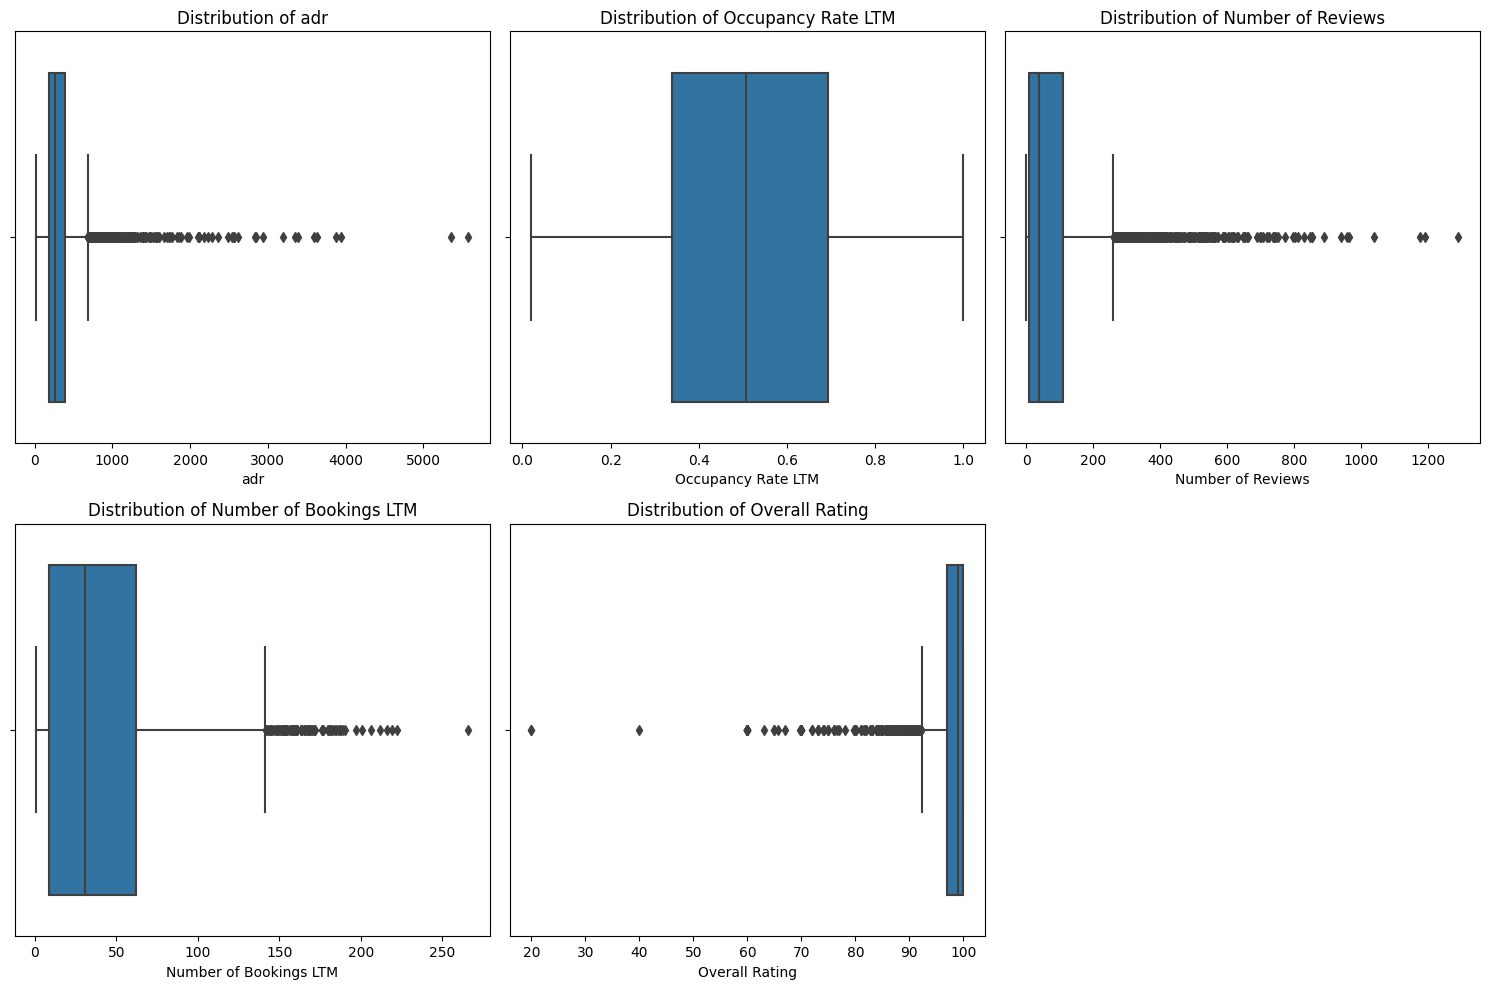

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting key numerical columns for visualization
columns_to_visualize = ["adr", "Occupancy Rate LTM", "Number of Reviews", "Number of Bookings LTM", "Overall Rating"]

# Plotting the distributions for these columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_cleaned[column])
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()


Given the above visualizations, we should consider inspecting:

1) Rows with an extremely high adr.
2) Rows with an extremely high Number of Reviews.
3) Rows with an extremely high Number of Bookings LTM.


In [56]:
# Function to compute the outlier threshold based on IQR
def compute_outlier_thresholds(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Calculating outlier thresholds for the selected columns
adr_lower, adr_upper = compute_outlier_thresholds(df_cleaned["adr"])
reviews_lower, reviews_upper = compute_outlier_thresholds(df_cleaned["Number of Reviews"])
bookings_lower, bookings_upper = compute_outlier_thresholds(df_cleaned["Number of Bookings LTM"])

# Filtering rows based on these thresholds
high_adr_rows = df_cleaned[df_cleaned["adr"] > adr_upper]
high_reviews_rows = df_cleaned[df_cleaned["Number of Reviews"] > reviews_upper]
high_bookings_rows = df_cleaned[df_cleaned["Number of Bookings LTM"] > bookings_upper]

# Returning the filtered rows for inspection
high_adr_rows.shape, high_reviews_rows.shape, high_bookings_rows.shape


((288, 26), (345, 26), (95, 26))

We have 288 rows with an extremely high adr value.

We have 345 rows with an extremely high Number of Reviews.

We have 95 rows with an extremely high Number of Bookings LTM.

These are likely luxury properties, and not erroneous. 

Let's now save this cleaned dataset as a CSV.

In [57]:
df_cleaned.shape

(4208, 26)

In [59]:
# Save the cleaned dataset as a CSV
csv_filename = "/Users/arka_bagchi/Desktop/AirDNA/cleaned_joshua_tree_data.csv"
df_cleaned.to_csv(csv_filename, index=False)

csv_filename

'/Users/arka_bagchi/Desktop/AirDNA/cleaned_joshua_tree_data.csv'